In [27]:
import numpy as np
from numpy.linalg import inv as inv, det as det
import matplotlib
import matplotlib.pyplot as plt
from math import sqrt as sqrt, pi, exp as exp
import time
import numpy as np
from numpy.linalg import inv as inv, det as det
import matplotlib
import matplotlib.pyplot as plt
from math import sqrt as sqrt, pi, exp as exp
import time


# # to measure the time taken for the code to complete
# start_time = time.time()


In [ ]:
# Μέρος Α


In [ ]:
# A.1


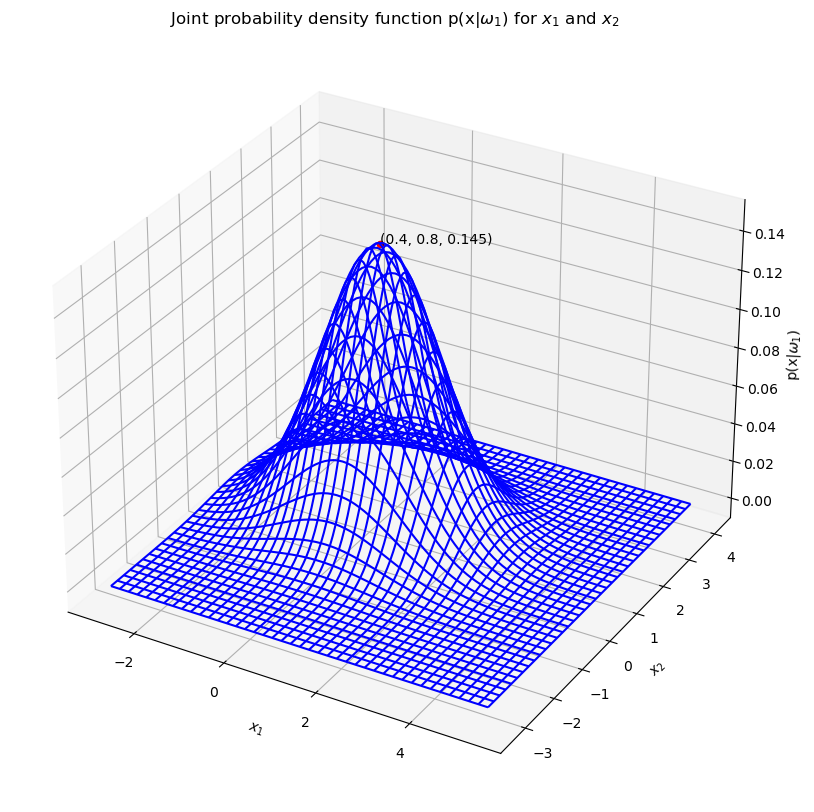

In [36]:
# p(x|ω1)

covMat = np.array([[1.5, 0], [0, 0.8]])
# To make all bells more defined
# covMat = np.array([[0.3, 0], [0, 0.2]])
sigmaX1 = sqrt(covMat[0][0])
sigmaX2 = sqrt(covMat[1][1])

mu1 = np.array([0.4, 0.8])
mu2 = np.array([1.5, 2.7])

# totalProbFunc = pCondOmega1*aPriori1 + pCondOmega2*aPriori2

# bounds up until where to plot the surface 
# rounding to the first (1) decimal is due to the values of the standard
# deviations in the covariance matrix 
lowBound1 = round(min(mu1[0] - 3*sigmaX1, mu2[0] - 3*sigmaX2), 1)
highBound1 = round(max(mu1[0] + 3*sigmaX1, mu2[0] + 3*sigmaX2), 1)

lowBound2 = round(min(mu1[1] - 3*sigmaX1, mu2[1] - 3*sigmaX2), 1)
highBound2 = round(max(mu1[1] + 3*sigmaX1, mu2[1] + 3*sigmaX2), 1)


mu1.shape = (2,1)
# mu2.shape = (2,1)
# the two substances x1, x2
step = 0.1
x1 = np.arange(lowBound1, highBound1, step)
x2 = np.arange(lowBound2, highBound2, step)
X1, X2 = np.meshgrid(x1, x2)


pCondOmega1 = np.empty((x2.size, x1.size))
l = covMat.shape[0]

# given the formula for multivariate distibution (x is a vector)
for j in range(x2.size):
    for i in range(x1.size):
        # x2 is the row (vertical axis) while x1 is the column (horizontal axis) in the meshgrid
        xTemp = np.array([[x2[j]], [x1[i]]])
        pCondOmega1[j][i] =  (1/(((2*pi)**(l/2))*sqrt(det(covMat))))\
    *exp((-1/2)*np.matmul(np.matmul(np.transpose(xTemp-mu1), inv(covMat)), xTemp-mu1))


fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X2, X1, pCondOmega1, color = 'b')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'p(x$\vert$$\omega_1$)')
ax.set_title(r'Joint probability density function p(x$\vert\omega_1$) for $x_1$ and $x_2$')
# xTemp: the mean of the joined distribution
xTemp = np.array(mu1)
l = covMat.shape[0]
# pCondOmegaOnMean is the p(x|w_1) on the mean of the joined distribution
pCondOmega1OnMean = (1/(((2*pi)**(l/2))*sqrt(det(covMat))))\
    *exp((-1/2)*np.matmul(np.matmul(np.transpose(xTemp-mu1), inv(covMat)), xTemp-mu1))


# xTemp is an array of arrays so the 0 element must be used
x = xTemp[0][0]
y = xTemp[1][0]
z = pCondOmega1OnMean 
label = '(%.1f, %.1f, %.3f)' % (x, y, z) 


ax.text(x, y, z, label)
ax.scatter3D(x, y, z, c = 'r', marker = 'o')
plt.show()


In [ ]:

#  p(x|ω2)


mu2.shape = (2,1)

# the code below is rewritten in a cell above
# the two substances x1, x2
# step = 0.1
# x1 = np.arange(lowBound1, highBound1, step)
# x2 = np.arange(lowBound2, highBound2, step)

# x2 is the row (vertical axis) while x1 is the column (horizontal axis) in the meshgrid
pCondOmega2 = np.empty((x2.size, x1.size))
# l = covMat.shape[0]

# given the formula for multivariate distibution (x is a vector)
for j in range(x2.shape[0]):
    for i in range(x1.shape[0]):
        # x2 is the row (vertical axis) while x1 is the column (horizontal axis) in the meshgrid
        xTemp = np.array([[x2[j]], [x1[i]]])
        pCondOmega2[j][i] = (1/(((2*pi)**(l/2))*sqrt(det(covMat))))\
            *exp((-1/2)*float(\
                np.matmul(np.matmul(np.transpose(xTemp-mu2), inv(covMat)), xTemp-mu2)))



# X1, X2 = np.meshgrid(x1, x2)


fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
# x2 is the row (vertical axis) while x1 is the column (horizontal axis) in the meshgrid
ax.plot_wireframe(X2, X1, pCondOmega2, color = 'b')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'p(x$\vert$$\omega_2$)')
ax.set_title(r'Joint probability density function p(x$\vert\omega_2$) for $x_1$ and $x_2$')
# xTemp: the mean of the joined distribution
xTemp = np.array(mu2)
# pCondOmegaOnMean is the p(x|w_2) on the mean of the joined distributioν
pCondOmega2OnMean = (1/(((2*pi)**(l/2))*sqrt(det(covMat))))\
    *exp((-1/2)*np.matmul(np.matmul(np.transpose(xTemp-mu2), inv(covMat)), xTemp-mu2))

# ax.text(xTemp(0), xTemp(1), pCondOmega1OnMean, '(%f, %f, %f)' \
#     % (xTemp(0), xTemp(1), pCondOmega1OnMean) )
# xTemp is an array of arrays so the 0 element must be used
x = xTemp[0][0]
y = xTemp[1][0]
z = pCondOmega2OnMean
# z = np.amax(pCondOmega2)
label = '(%.1f, %.1f, %.3f)' % (x, y, z) 


ax.text(x, y, z, label)
ax.scatter3D(x, y, z, c = 'r', marker = 'o')
# ax.view_init(45, 45)
plt.show()

# print('The program ended now')
# print("--- %s seconds ---" % (time.time() - start_time))


In [ ]:

# A.2 Ολική κατανομή πιθανότητας


In [ ]:
# p(x) = p(x|ω1)p(ω1) + p(x|ω2)p(ω2)
aPriori1 = 1
aPriori2 = 1

totalProbFunc = pCondOmega1*aPriori1 +  pCondOmega2*aPriori2


step = 0.1
x1 = np.arange(lowBound1, highBound1, step)
x2 = np.arange(lowBound2, highBound2, step)

X1, X2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X2, X1, totalProbFunc, color = 'b')
ax.set_zlabel(r'p(x)')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('Total probability density function p(x)')
# ax2.view_init(0, 45)


In [ ]:

# Α.3 A posteriori πιθανότητες (νόμος Bayes)


In [ ]:

# A posteriori probability for class 1 
aPosteriori1 = np.divide(pCondOmega1*aPriori1,totalProbFunc)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')

ax.plot_wireframe(X2, X1, aPosteriori1, color = 'b')
# ax.plot_wireframe(X2, X1, aPosteriori1, color = 'b')

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'p($\omega1$$\vert$x)')
ax.set_title(r'A posteriori probability p($\omega1$$\vert$x)')
# ax2.view_init(0, 45)

In [ ]:
# A posteriori probability for class 2 
aPosteriori2 = pCondOmega2*aPriori2/totalProbFunc
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')

ax.plot_wireframe(X2, X1, aPosteriori2, color = 'b')

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'p($\omega2$$\vert$x)')
ax.set_title(r'A posteriori probability p($\omega2$$\vert$x)')
# ax.set_title(r'Sum of a posteriori probabilities p($\omega1$$\vert$x) + p($\omega2$$\vert$x)')
# ax2.view_init(0, 45)

In [ ]:
# Sum of a posteriori probabilities

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')

ax.plot_wireframe(X2, X1, aPosteriori1 + aPosteriori2, color = 'b')

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'p($\omega2$$\vert$x)')
ax.set_title(r'Sum of a posteriori probabilities p($\omega1$$\vert$x) + p($\omega2$$\vert$x)')
# ax2.view_init(0, 45)

In [ ]:


# Α.4 Σφάλμα κατα Bayes 



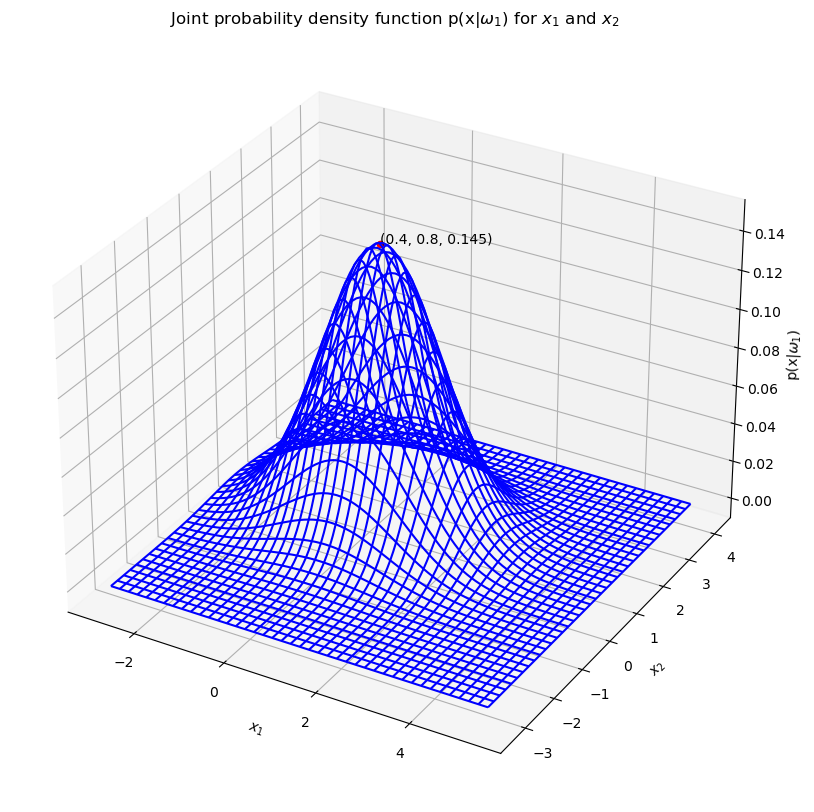

In [35]:

# Μέρος Β

# Β.1 (Επανάληψη των βημάτων 1-4)

# Β.1.1
# p(x|ω1)

# For p(x|ω1), the covariance matrix remains the same, hence the pCondOmega1
# is the same as before. The same goes for the resulting graph.  

covMat1 = np.array([[1.5, 0], [0, 0.8]])
covMat2 = covMat1/4
# To make all bells more defined
# covMat = np.array([[0.3, 0], [0, 0.2]])

# sigmaX1 = sqrt(covMat1[0][0])
# sigmaX2 = sqrt(covMat1[1][1])

mu1 = np.array([0.4, 0.8])
mu2 = np.array([1.5, 2.7])

# totalProbFunc = pCondOmega1*aPriori1 + pCondOmega2*aPriori2

# bounds up until where to plot the surface 
# The two covariance matrices are now different for the two 
# classes. Therefore, the calculation of the if we consider that the covariance matrix Σ2  
# is smaller than the Σ1, we can keep the 

# max standard deviation between the classes
sigmaMax1 = sqrt(max(covMat1[0][0], covMat2[0][0]))
sigmaMax2 = sqrt(max(covMat1[1][1], covMat2[1][1]) )


lowBound1 = round(min(mu1[0] - 3*sigmaMax1, mu2[0] - 3*sigmaMax2), 1)
highBound1 = round(max(mu1[0] + 3*sigmaMax1, mu2[0] + 3*sigmaMax2), 1)

lowBound2 = round(min(mu1[1] - 3*sigmaMax1, mu2[1] - 3*sigmaMax2), 1)
highBound2 = round(max(mu1[1] + 3*sigmaMax1, mu2[1] + 3*sigmaMax2), 1)


mu1.shape = (2,1)

# the two substances x1, x2
step = 0.1
x1 = np.arange(lowBound1, highBound1, step)
x2 = np.arange(lowBound2, highBound2, step)
X1, X2 = np.meshgrid(x1, x2)


pCondOmega1 = np.empty((x2.size, x1.size))
l = covMat1.shape[0]

# given the formula for multivariate distibution (x is a vector)
for j in range(x2.size):
    for i in range(x1.size):
        # x2 is the row (vertical axis) while x1 is the column (horizontal axis) in the meshgrid
        xTemp = np.array([[x2[j]], [x1[i]]])
        pCondOmega1[j][i] =  (1/(((2*pi)**(l/2))*sqrt(det(covMat1))))\
    *exp((-1/2)*float(np.matmul(np.matmul(np.transpose(xTemp-mu1), inv(covMat1)), xTemp-mu1)))

# # given the formula for multivariate distibution (x is a vector)
# for j in range(x2.size):
#     for i in range(x1.size):
#         # x2 is the row (vertical axis) while x1 is the column (horizontal axis) in the meshgrid
#         xTemp = np.array([[x2[j]], [x1[i]]])
#         pCondOmega1[j][i] =  (1/(((2*pi)**(l/2))*sqrt(det(covMat))))\
#     *exp((-1/2)*np.matmul(np.matmul(np.transpose(xTemp-mu1), inv(covMat)), xTemp-mu1))


fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X2, X1, pCondOmega1, color = 'b')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'p(x$\vert$$\omega_1$)')
ax.set_title(r'Joint probability density function p(x$\vert\omega_1$) for $x_1$ and $x_2$')
# xTemp: the mean of the joined distribution
xTemp = np.array(mu1)
l = covMat1.shape[0]
# pCondOmegaOnMean is the p(x|w_1) on the mean of the joined distribution
pCondOmega1OnMean = (1/(((2*pi)**(l/2))*sqrt(det(covMat1))))\
    *exp((-1/2)*float(np.matmul(np.matmul(np.transpose(xTemp-mu1), inv(covMat1)), xTemp-mu1)))


# xTemp is an array of arrays so the 0 element must be used
x = xTemp[0][0]
y = xTemp[1][0]
z = pCondOmega1OnMean 
label = '(%.1f, %.1f, %.3f)' % (x, y, z) 


ax.text(x, y, z, label)
ax.scatter3D(x, y, z, c = 'r', marker = 'o')
plt.show()



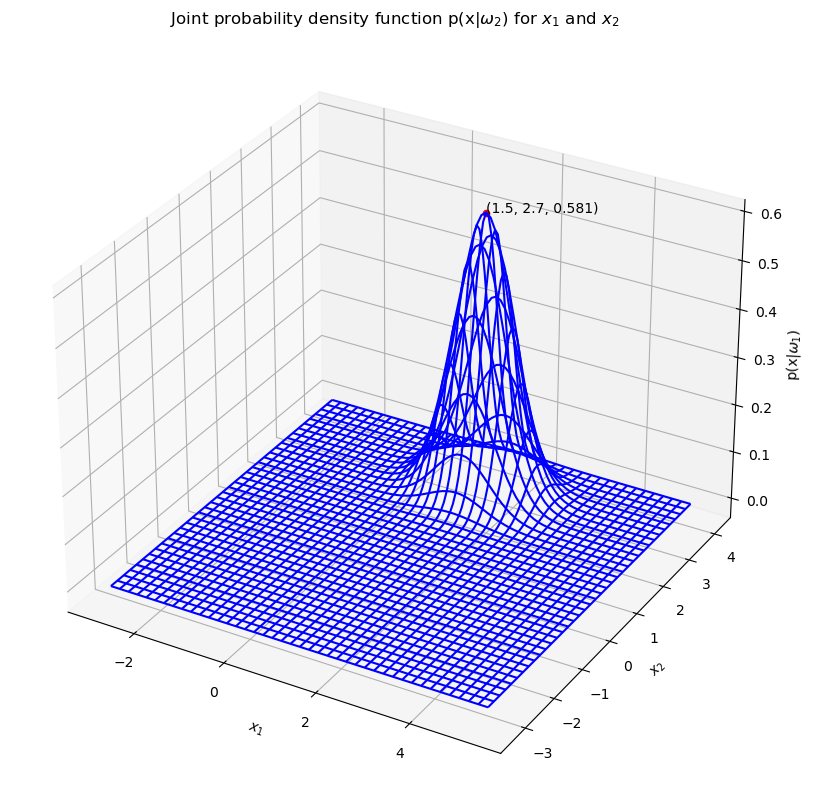

In [30]:
# p(x|ω2)

# For p(x|ω2), the covariance matrix changes, hence the pCondOmega2
# is not the same as before. The same goes for the resulting graph.  

covMat2 = covMat1/4
# To make all bells more defined
# covMat = np.array([[0.3, 0], [0, 0.2]])

# totalProbFunc = pCondOmega1*aPriori1 + pCondOmega2*aPriori2

# bounds up until where to plot the surface 
# The two covariance matrices are now different for the two 
# classes. Therefore, the calculation of the if we consider that the covariance matrix Σ2  
# is smaller than the Σ1, we can keep the 

# max standard deviation between the classes
sigmaMax1 = sqrt(max(covMat1[0][0], covMat2[0][0]))
sigmaMax2 = sqrt(max(covMat1[1][1], covMat2[1][1]) )


lowBound1 = np.round(min(mu1[0] - 3*sigmaMax1, mu2[0] - 3*sigmaMax2), 1)
highBound1 = np.round(max(mu1[0] + 3*sigmaMax1, mu2[0] + 3*sigmaMax2), 1)

lowBound2 = np.round(min(mu1[1] - 3*sigmaMax1, mu2[1] - 3*sigmaMax2), 1)
highBound2 = np.round(max(mu1[1] + 3*sigmaMax1, mu2[1] + 3*sigmaMax2), 1)


# mu1.shape = (2,1)
mu2.shape = (2,1)
# the two substances x1, x2
step = 0.1
x1 = np.arange(lowBound1, highBound1, step)
x2 = np.arange(lowBound2, highBound2, step)
X1, X2 = np.meshgrid(x1, x2)


pCondOmega1 = np.empty((x2.size, x1.size))
l = covMat1.shape[0]

# given the formula for multivariate distibution (x is a vector)
for j in range(x2.size):
    for i in range(x1.size):
        # x2 is the row (vertical axis) while x1 is the column (horizontal axis) in the meshgrid
        xTemp = np.array([[x2[j]], [x1[i]]])
        pCondOmega1[j][i] =  (1/(((2*pi)**(l/2))*sqrt(det(covMat2))))\
    *exp((-1/2)*float(np.matmul(np.matmul(np.transpose(xTemp-mu2), inv(covMat2)), xTemp-mu2)))


fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X2, X1, pCondOmega1, color = 'b')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'p(x$\vert$$\omega_1$)')
ax.set_title(r'Joint probability density function p(x$\vert\omega_2$) for $x_1$ and $x_2$')
# xTemp: the mean of the joined distribution
xTemp = np.array(mu2)
l = covMat2.shape[0]
# pCondOmegaOnMean is the p(x|w_1) on the mean of the joined distribution
pCondOmega2OnMean = 1/(((2*pi)**(l/2))*sqrt(det(covMat2)))\
    *exp((-1/2)*np.matmul(np.matmul(np.transpose(xTemp-mu2), inv(covMat2)), xTemp-mu2))


# xTemp is an array of arrays so the 0 element must be used
x = xTemp[0][0]
y = xTemp[1][0]
z = pCondOmega2OnMean 
label = '(%.1f, %.1f, %.3f)' % (x, y, z) 


ax.text(x, y, z, label)
ax.scatter3D(x, y, z, c = 'r', marker = 'o')
plt.show()


In [ ]:

# The bell shape is visibly narrower due to the smaller standard devation 
# of the occurence of substances x1 and x2 in the class ω2 (cancer patient)

In [ ]:

# Β.1.2 
# p(x) = p(x|ω1)p(ω1) + p(x|ω2)p(ω2)
aPriori1 = 1
aPriori2 = 1

totalProbFunc = pCondOmega1*aPriori1 +  pCondOmega2*aPriori2


step = 0.1
x1 = np.arange(lowBound1, highBound1, step)
x2 = np.arange(lowBound2, highBound2, step)

X1, X2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X2, X1, totalProbFunc, color = 'b')
ax.set_zlabel(r'p(x)')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title('Total probability density function p(x)')
# ax2.view_init(0, 45)

In [ ]:


# Β.1.3 
# Β.1.4  

# Παρατηρήσεις, σημειώσεις, κάθε ερώτημα να είναι ξεχωριστό και να έχεις και σχόλια, επικεφαλίδες σε Markdown



